<a href="https://colab.research.google.com/github/drashtikshah/Machine-Learning/blob/main/ml_4_2_LogisticRegression_drashti_60009210079.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

weights,params=[],[]
for c in np.arange(0,5):
  lr=LogisticRegression(C=10**c,random_state=0)
  lr.fit(X_train_std,y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)
weights=np.array(weights)

<function matplotlib.pyplot.show(close=None, block=None)>

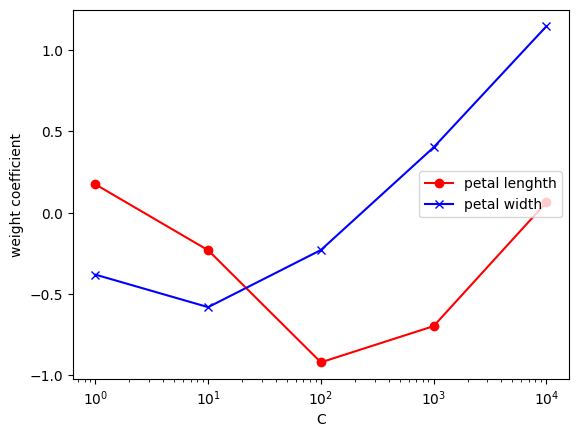

In [ ]:
import matplotlib.pyplot as plt
plt.plot(params,weights[:,0],color='red',marker='o',label='petal lenghth')
plt.plot(params,weights[:,1],color='blue',marker='x',label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='right')
plt.xscale('log')
plt.show

In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets
from sklearn.svm import l1_min_c

iris=datasets.load_iris()
X=iris.data
y=iris.target

X=X[y!=2]
y=y[y!=2]

X/=X.max()

Computing regularization path..
this took 0.202s


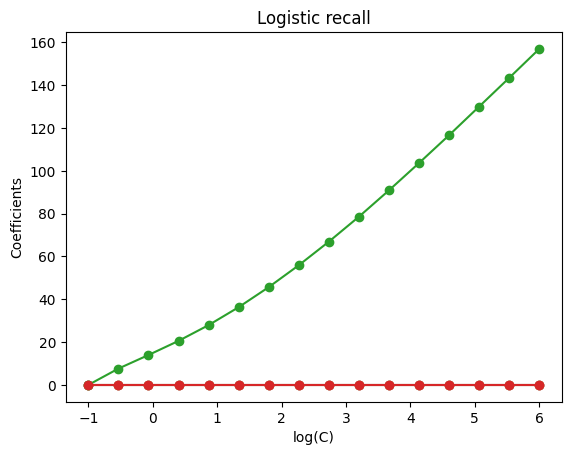

In [ ]:
cs=l1_min_c(X,y,loss='log')*np.logspace(0,7,16)

print('Computing regularization path..')
start=time()
clf=linear_model.LogisticRegression(
    penalty="l1",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0
  )
coefs_=[]
for c in cs:
  clf.set_params(C=c)
  clf.fit(X,y)
  coefs_.append(clf.coef_.ravel().copy())
print("this took %0.3fs"%(time() - start))

coefs_=np.array(coefs_)
plt.plot(np.log10(cs),coefs_,marker='o')
ymin,ymax=plt.ylim()
plt.xlabel('log(C)')
plt.ylabel("Coefficients")
plt.title("Logistic recall")
plt.axis("Tight")
plt.show()
